
## G2F Maize Competition

#### November 2023

Steps to build a machine learning pipeline is like this:
1. [Data Analysis](#data)
2. [Preprocessing](#prep)
3. [Data Spliting](#split)
4. [Modeling and Model Evaluation](#model)


<a id='data'></a>
## 1. Data Analysis

The important idea behind this part is to understand if the data structure is suiatable for machine learning proces or not. This includes identifying null values, and data statistics. For this purposes data is loadaed using pandas library. Steps includes summary of column data types, first few rows for an overwiev of the data, checking for missing values adn statistical summary of continuous variables.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Load Data
file_path = 'G2F_data.csv'
data = pd.read_csv(file_path)

# Display basic information
print("Dataset Information:")
print(data.info())

# Display first few rows
print("\nFirst Few Rows:")
print(data.head())

# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing Values:")
print(missing_values[missing_values > 0])

# Statistical summary of continuous variables
print("\nStatistical Summary:")
print(data.describe())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3302 entries, 0 to 3301
Data columns (total 77 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Hybrid          3302 non-null   object 
 1   Env             3302 non-null   object 
 2   Win_YN          3302 non-null   object 
 3   moisture        3302 non-null   float64
 4   test_weight     3302 non-null   float64
 5   root_lodging    3302 non-null   float64
 6   stalk_lodging   3302 non-null   float64
 7   plant_height    3302 non-null   float64
 8   ear_height      3302 non-null   float64
 9   silk            3302 non-null   float64
 10  pollen          3302 non-null   float64
 11  Rain_1          3302 non-null   float64
 12  Rain_2          3302 non-null   float64
 13  Rain_3          3302 non-null   float64
 14  Rain_5          3302 non-null   float64
 15  Rain_6          3302 non-null   float64
 16  Rain_7          3302 non-null   float64
 17  Rain_8      

<a id='prep'></a>
## 2. Preprocessing

This step includes encoding categorical variables, outlier detection,feature scaling, aggregation, engineering adn feature selection

In [ ]:
# Split the 'Env' column into separate features
data[['State', 'Trial_Year']] = data['Env'].str.split('_', expand=True, n=1)
data[['Trial', 'Year']] = data['State'].str.split('H', expand=True, n=1)
data.drop(columns=['Env', 'Trial_Year', 'Year'], inplace=True)

In [ ]:
#1. encode cat variables
from sklearn.preprocessing import LabelEncoder
print(data.head())
label_encoders = {}
categorical_cols = ['Hybrid','Trial', 'State','field_location', 'Win_YN']
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

          Hybrid Win_YN  moisture  test_weight  root_lodging  stalk_lodging  \
0     PB80/PHZ51      N    15.150   912.614331           3.0            2.0   
1        WF9/H95      Y    17.700   731.121213           0.0            2.0   
2  LH212HT/LH195      Y    19.000   762.657251           0.0            2.0   
3      B73/PHM49      N    16.695   731.121213           0.0            1.5   
4      B73/PHN82      N    24.380   666.633233           0.0            0.4   

   plant_height  ear_height  silk  pollen  ...  TempStress_7  TempStress_8  \
0        235.00      130.50  58.5    56.0  ...           1.0      1.000000   
1        229.00      110.00  65.0    64.0  ...           1.0      1.000000   
2        229.00      110.00  65.0    64.0  ...           1.0      1.000000   
3        209.55       80.01  56.0    57.0  ...           1.0      1.000000   
4        256.30      135.20  67.7    66.1  ...           1.0      0.965669   

   TempStress_10  TempStress_11   latitude  longitude  y

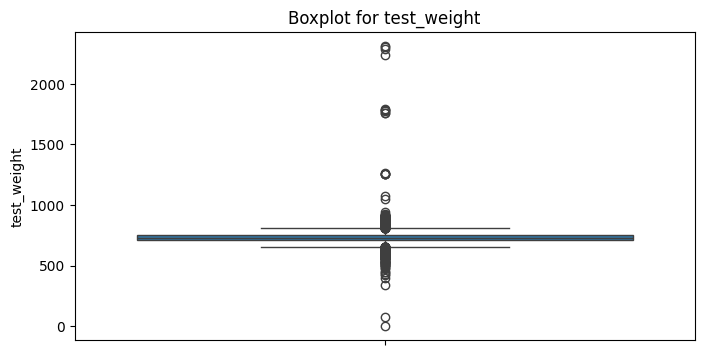

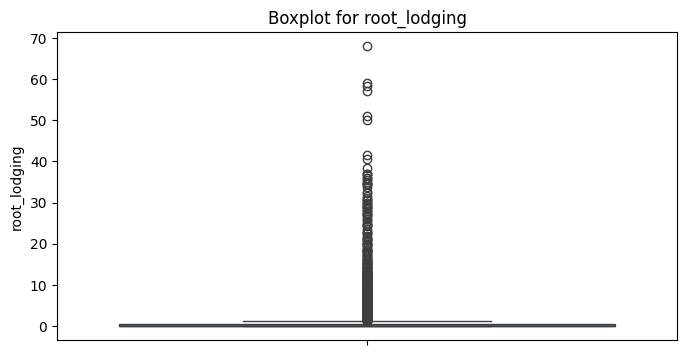

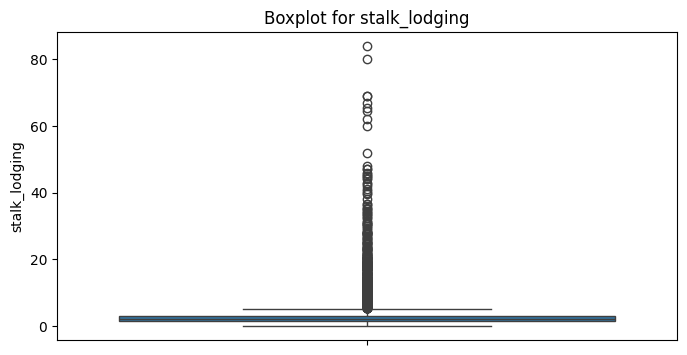

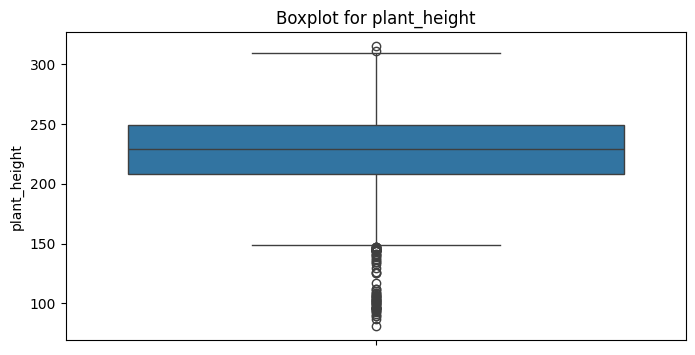

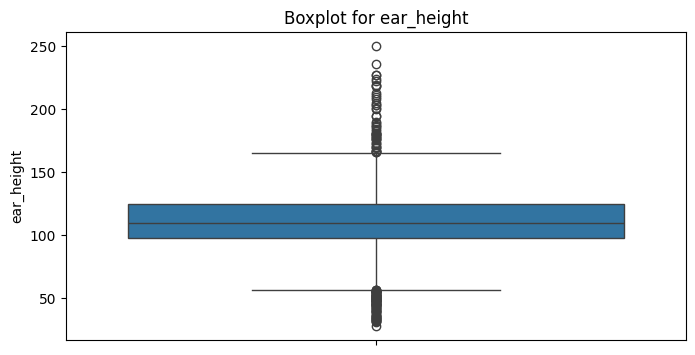

In [ ]:
#2. Outliers
import matplotlib.pyplot as plt
import seaborn as sns
# Visualize distributions of key numerical columns
columns_to_check = ['test_weight', 'root_lodging', 'stalk_lodging', 'plant_height', 'ear_height']
for col in columns_to_check:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data[col])
    plt.title(f"Boxplot for {col}")
    plt.show()


In [ ]:
#3. feature scaling
from sklearn.preprocessing import StandardScaler
exclude_cols = ['Hybrid', 'Trial', 'State', 'field_location', 'Win_YN', 'latitude', 'longitude', 'year','silk','pollen']
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns.difference(exclude_cols)
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])
print("\nScaled Numerical Data:")
print(data[numerical_cols].head())
print("\nExcluded Columns (Unchanged):")
print(data[exclude_cols].head())


Scaled Numerical Data:
   AccPrecip_1  AccPrecip_10  AccPrecip_11  AccPrecip_2  AccPrecip_3  \
0     0.931540      0.631976      1.208317    -0.558688    -1.086810   
1    -0.353122     -0.607278      0.870752     2.844313     0.458562   
2     0.421117     -0.257687     -0.928409     1.240828     0.226604   
3     0.000288     -0.843265     -0.683478    -0.557586    -0.813400   
4    -0.433491      1.069800     -0.447340    -0.024560     1.107288   

   AccPrecip_5  AccPrecip_6  AccPrecip_7  AccPrecip_8    MaxT_1  ...  \
0     1.412114     5.601394     2.980427    -0.716109  1.926693  ...   
1    -0.653088    -0.415884     0.583650    -0.205516  1.317868  ...   
2    -0.821101    -0.545566    -0.327141    -0.821244 -0.769829  ...   
3    -0.512049    -0.430041    -0.554810    -1.207375  1.431352  ...   
4     0.591292     0.035676    -0.903572    -0.046926 -0.865905  ...   

   ThermalTime_5  ThermalTime_6  ThermalTime_7  ThermalTime_8  ear_height  \
0       0.903450       0.467356  

In [ ]:
#4. Feature aggregation - depending on the phenological stages
# Define phenological stages
phenological_stages = {
    'fallow_initial': ['Rain_1', 'AccPrecip_1', 'Radn_1', 'MaxT_1', 'MinT_1', 'ThermalTime_1', 'TempStress_1'],
    'veg_early': ['Rain_2', 'AccPrecip_2', 'Radn_2', 'MaxT_2', 'MinT_2', 'ThermalTime_2', 'TempStress_2'],
    'veg_late': ['Rain_3', 'AccPrecip_3', 'Radn_3', 'MaxT_3', 'MinT_3', 'ThermalTime_3', 'TempStress_3'],
    'flowering': ['Rain_5', 'AccPrecip_5', 'Radn_5', 'MaxT_5', 'MinT_5', 'ThermalTime_5', 'TempStress_5'],
    'grainf_early': ['Rain_6', 'AccPrecip_6', 'Radn_6', 'MaxT_6', 'MinT_6', 'ThermalTime_6'], # TempStress_6 is missing
    'grainf_late': ['Rain_7', 'AccPrecip_7', 'Radn_7', 'MaxT_7', 'MinT_7', 'ThermalTime_7', 'TempStress_7'],
    'fallow_end': ['Rain_8', 'AccPrecip_8', 'Radn_8', 'MaxT_8', 'MinT_8', 'ThermalTime_8', 'TempStress_8'],
    'unk_10': ['Rain_10', 'AccPrecip_10', 'Radn_10', 'MaxT_10', 'MinT_10', 'ThermalTime_10', 'TempStress_10'],
    'unk_11': ['Rain_11', 'AccPrecip_11', 'Radn_11', 'MaxT_11', 'MinT_11', 'ThermalTime_11', 'TempStress_11']
}
# Aggregate features
for stage, features in phenological_stages.items():
    data[f"{stage}_mean"] = data[features].mean(axis=1)
    #data[f'{stage}_std'] = data[features].std(axis=1)
# Drop original period-specific columns
columns_to_drop = [col for stage in phenological_stages.values() for col in stage]
data.drop(columns=columns_to_drop, inplace=True)

In [ ]:
#5. feature engineerng

data['height_x_flowering_radn'] = data['plant_height'] * data['flowering_mean']
data['height_x_ear_height'] = data['plant_height'] * data['ear_height']
data['silk_pollen_diff'] = data['silk'] - data['pollen']


In [ ]:
# 6. Apply log transformation to skewed features
skewed_features = ['root_lodging', 'stalk_lodging']
for feature in skewed_features:
    data[f'{feature}_log'] = np.log1p(data[feature])

# Check log-transformed features
print("\nLog-Transformed Features:")
print(data[[f'{feature}_log' for feature in skewed_features]].head())


Log-Transformed Features:
   root_lodging_log  stalk_lodging_log
0          0.241548          -0.339456
1         -0.355094          -0.339456
2         -0.355094          -0.339456
3         -0.355094          -0.448892
4         -0.355094          -0.742495


In [ ]:
data['test_weight'] = data['test_weight'].apply(lambda x: x if x > 0 else 1e-6)
# Apply log transformation
data['test_weight_log'] = np.log1p(data['test_weight'])

Highly Correlated Features (Threshold > 0.85):
('root_lodging', 'root_lodging_log')
('stalk_lodging', 'stalk_lodging_log')
('silk', 'pollen')
('field_location', 'Trial')
('State', 'Trial')
('fallow_end_mean', 'unk_10_mean')
('fallow_end_mean', 'unk_11_mean')
('unk_10_mean', 'unk_11_mean')


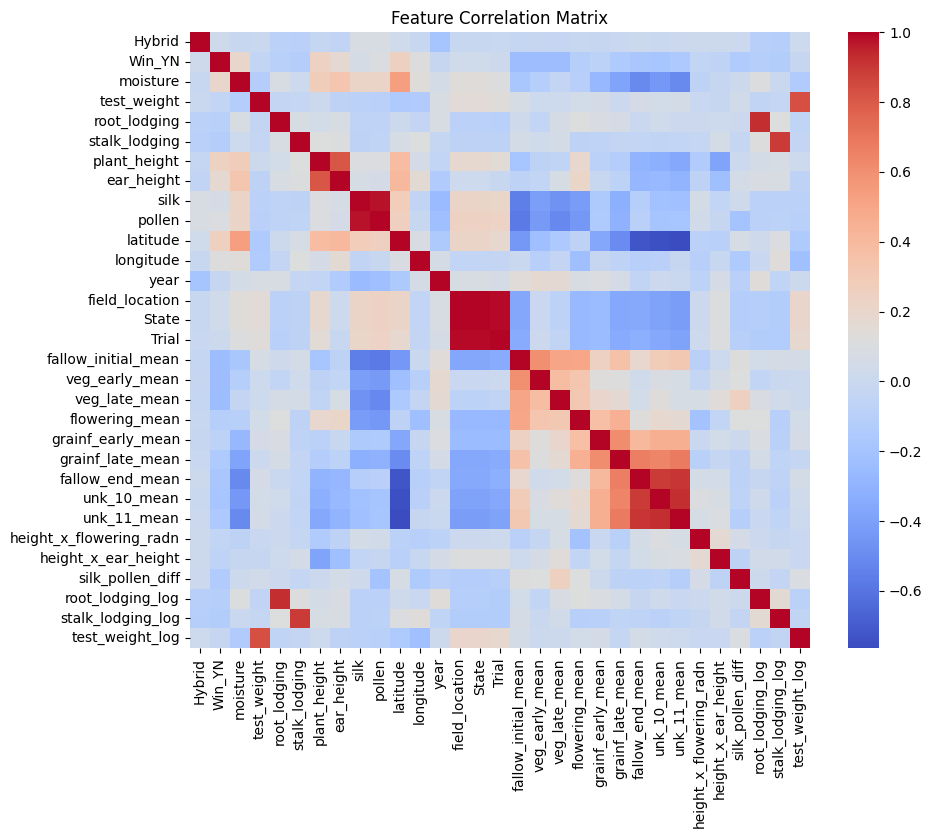

In [ ]:
# Feature selection - coorelation matrix
# correlated features
import seaborn as sns
import matplotlib.pyplot as plt
threshold = 0.85
# Compute correlation matrix
corr_matrix = data.corr()
# Identify pairs of highly correlated features
high_corr_pairs = np.where((np.abs(corr_matrix) > threshold) & (corr_matrix != 1))
high_corr_pairs = [(corr_matrix.index[x], corr_matrix.columns[y]) for x, y in zip(*high_corr_pairs) if x < y]
print("Highly Correlated Features (Threshold > 0.85):")
for pair in high_corr_pairs:
    print(pair)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', cbar=True)
plt.title('Feature Correlation Matrix')
plt.show()

In [ ]:
# Keep track of features to drop
features_to_drop = set()
for feature1, feature2 in high_corr_pairs:
    # Retain one feature (feature1) and drop the other (feature2)
    features_to_drop.add(feature2)
# Drop redundant features
data = data.drop(columns=list(features_to_drop))
print("\nFeatures after removing redundancies:")
print(data.columns)


Features after removing redundancies:
Index(['Hybrid', 'Win_YN', 'moisture', 'test_weight', 'root_lodging',
       'stalk_lodging', 'plant_height', 'ear_height', 'silk', 'latitude',
       'longitude', 'year', 'field_location', 'State', 'fallow_initial_mean',
       'veg_early_mean', 'veg_late_mean', 'flowering_mean',
       'grainf_early_mean', 'grainf_late_mean', 'fallow_end_mean',
       'height_x_flowering_radn', 'height_x_ear_height', 'silk_pollen_diff',
       'test_weight_log'],
      dtype='object')


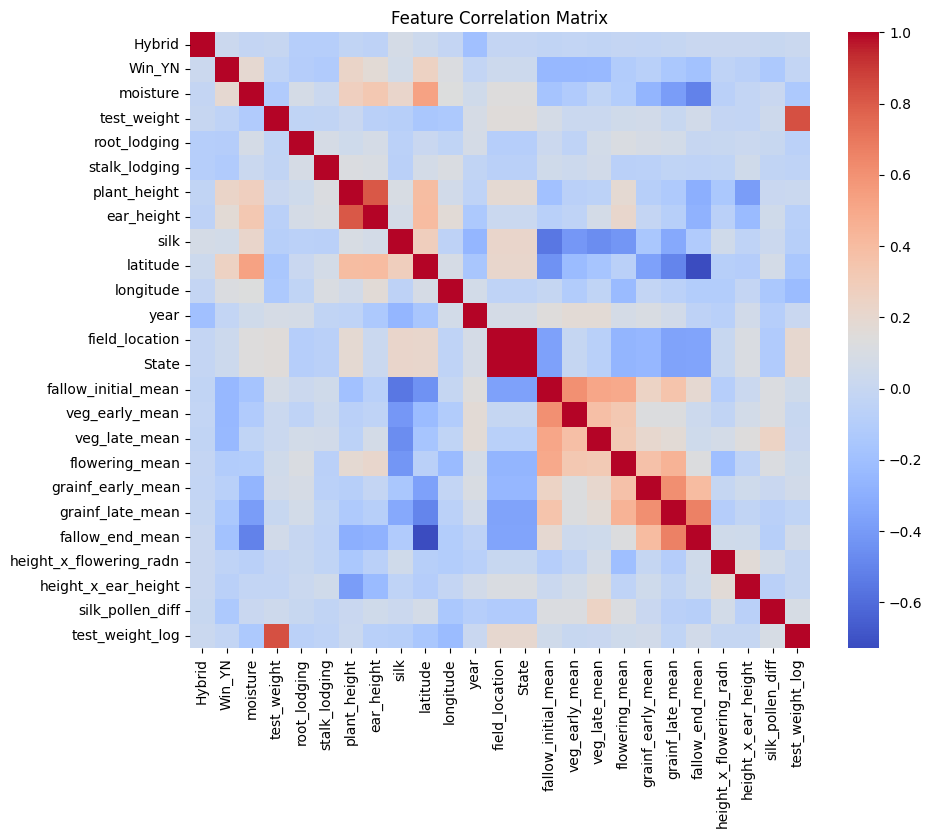

In [ ]:
#plot correlation again
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', cbar=True)
plt.title('Feature Correlation Matrix')
plt.show()

<a id='split'></a>
## 3. Data Spliting

Data is divided as 80% train and 20% test.

In [ ]:
from sklearn.model_selection import train_test_split
X = data.drop(columns=['Win_YN'])  # Drop the target column
y = data['Win_YN']  # Target column
# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
# Check for missing values in training and testing data
print("Missing values in X_train:")
print(X_train.isnull().sum().sort_values(ascending=False))

print("\nMissing values in X_test:")
print(X_test.isnull().sum().sort_values(ascending=False))

Missing values in X_train:
Hybrid                     0
moisture                   0
silk_pollen_diff           0
height_x_ear_height        0
height_x_flowering_radn    0
fallow_end_mean            0
grainf_late_mean           0
grainf_early_mean          0
flowering_mean             0
veg_late_mean              0
veg_early_mean             0
fallow_initial_mean        0
State                      0
field_location             0
year                       0
longitude                  0
latitude                   0
silk                       0
ear_height                 0
plant_height               0
stalk_lodging              0
root_lodging               0
test_weight                0
test_weight_log            0
dtype: int64

Missing values in X_test:
Hybrid                     0
moisture                   0
silk_pollen_diff           0
height_x_ear_height        0
height_x_flowering_radn    0
fallow_end_mean            0
grainf_late_mean           0
grainf_early_mean          0
flowe

<a id='model'></a>
## 4. Model Building and Evaluation

Different models was tried to find out whihc model works better in the data. These models are logistic regression, decision tree, random forest, and gradient boosting. For random forest and gradient boosting hyperparaeter tuning was trid to see if the accuracy could be improved or not. Gradient boosting gave the highest accuracy, so this model was selected at the end.

I tried different models and different variables, I keep changing the variables and models to try different models. I tried Cluster based and Hybrid based models as announced in Canvas. These models gave around 70% percent accuracies.


In [ ]:
#1. Logistic Regression
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.81      0.77       390
           1       0.67      0.58      0.62       271

    accuracy                           0.71       661
   macro avg       0.70      0.69      0.70       661
weighted avg       0.71      0.71      0.71       661



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#2. Decision tree
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.76      0.78       390
           1       0.68      0.71      0.69       271

    accuracy                           0.74       661
   macro avg       0.73      0.74      0.73       661
weighted avg       0.74      0.74      0.74       661



In [ ]:
#3. Random Forest
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       390
           1       0.77      0.73      0.75       271

    accuracy                           0.80       661
   macro avg       0.80      0.79      0.79       661
weighted avg       0.80      0.80      0.80       661



In [ ]:
#3.1. Hyperparameter Tuning for RF:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300], # number of trees in the forst
    'max_depth': [None, 10, 20, 30], # max depth of each tree
    'min_samples_split': [2, 5, 10], # min number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4], # min number of samples required to be at a leaf node
    'max_features': ['sqrt', 'log2'] # number of features to consider when looking for the best split
}

In [ ]:
# Random Forest
rf = RandomForestClassifier(random_state=42)
# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,  # 3-fold cross-validation
    scoring='accuracy',  # Optimize for accuracy
    n_jobs=-1,  # Use all processors
    verbose=2  # Show progress
)

In [ ]:
# Fit the grid search to the training data
grid_search.fit(X_train, y_train)
# Display the best parameters and the best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Best Cross-Validation Accuracy: 0.8129480101812678


In [ ]:
# Train the final model with best parameters
best_rf = grid_search.best_estimator_
# Fit on the training data
best_rf.fit(X_train, y_train)
# Predict on the test set
y_pred = best_rf.predict(X_test)
# Evaluate the final model
from sklearn.metrics import classification_report, roc_auc_score
print("Classification Report:")
print(classification_report(y_test, y_pred))
# Compute ROC-AUC
y_proba = best_rf.predict_proba(X_test)[:, 1]
print(f"ROC-AUC: {roc_auc_score(y_test, y_proba):.2f}")

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       390
           1       0.76      0.73      0.74       271

    accuracy                           0.79       661
   macro avg       0.79      0.78      0.79       661
weighted avg       0.79      0.79      0.79       661

ROC-AUC: 0.88


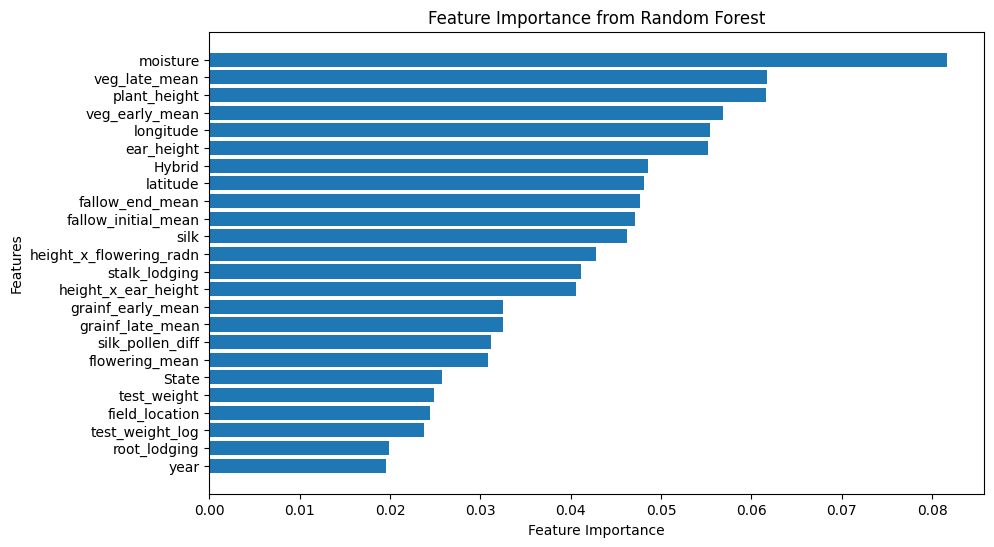

In [ ]:
# visualize fature importance to understand the key drivers of the targer
import matplotlib.pyplot as plt
import pandas as pd
# Get feature importance
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_rf.feature_importances_
}).sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
low_importance_features = ['year', 'root_lodging']#, 'Trial', 'root_lodging','root_lodging_log', 'Cluster' ]#, 'year_trend', 'latitude_longitude_interaction']
# Drop low-importance features
X_train_reduced = X_train.drop(columns=low_importance_features)
X_test_reduced = X_test.drop(columns=low_importance_features)
# Retrain and evaluate
model.fit(X_train_reduced, y_train)
y_pred = model.predict(X_test_reduced)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84       390
           1       0.77      0.74      0.76       271

    accuracy                           0.80       661
   macro avg       0.80      0.79      0.80       661
weighted avg       0.80      0.80      0.80       661



In [ ]:
#4. Gradient Boosting
from xgboost import XGBClassifier

model = XGBClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       390
           1       0.76      0.74      0.75       271

    accuracy                           0.80       661
   macro avg       0.79      0.79      0.79       661
weighted avg       0.80      0.80      0.80       661



<Figure size 1000x600 with 0 Axes>

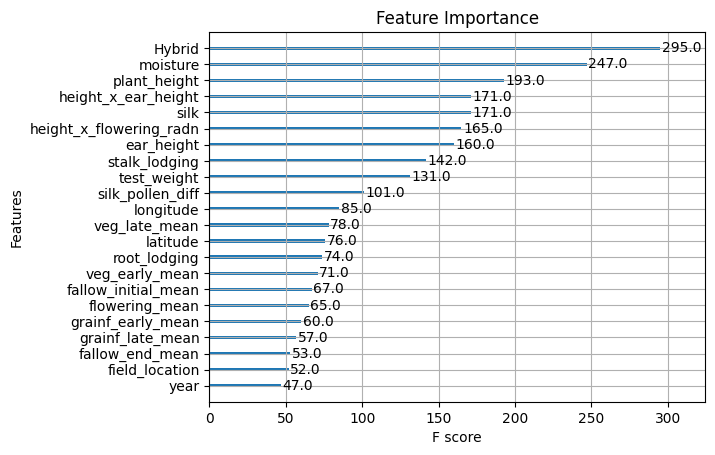

In [ ]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

# Plot feature importance
plt.figure(figsize=(10, 6))
plot_importance(model, importance_type="weight")
plt.title("Feature Importance")
plt.show()

In [ ]:
# Drop low-importance features and retrain
low_importance_features = ['year', 'fallow_end_mean','field_location']#, 'flowering_mean','fallow_end_mean']
X_train_reduced = X_train.drop(columns=low_importance_features)
X_test_reduced = X_test.drop(columns=low_importance_features)

# Retrain the model
model.fit(X_train_reduced, y_train)
y_pred = model.predict(X_test_reduced)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83       390
           1       0.75      0.74      0.75       271

    accuracy                           0.79       661
   macro avg       0.79      0.79      0.79       661
weighted avg       0.79      0.79      0.79       661



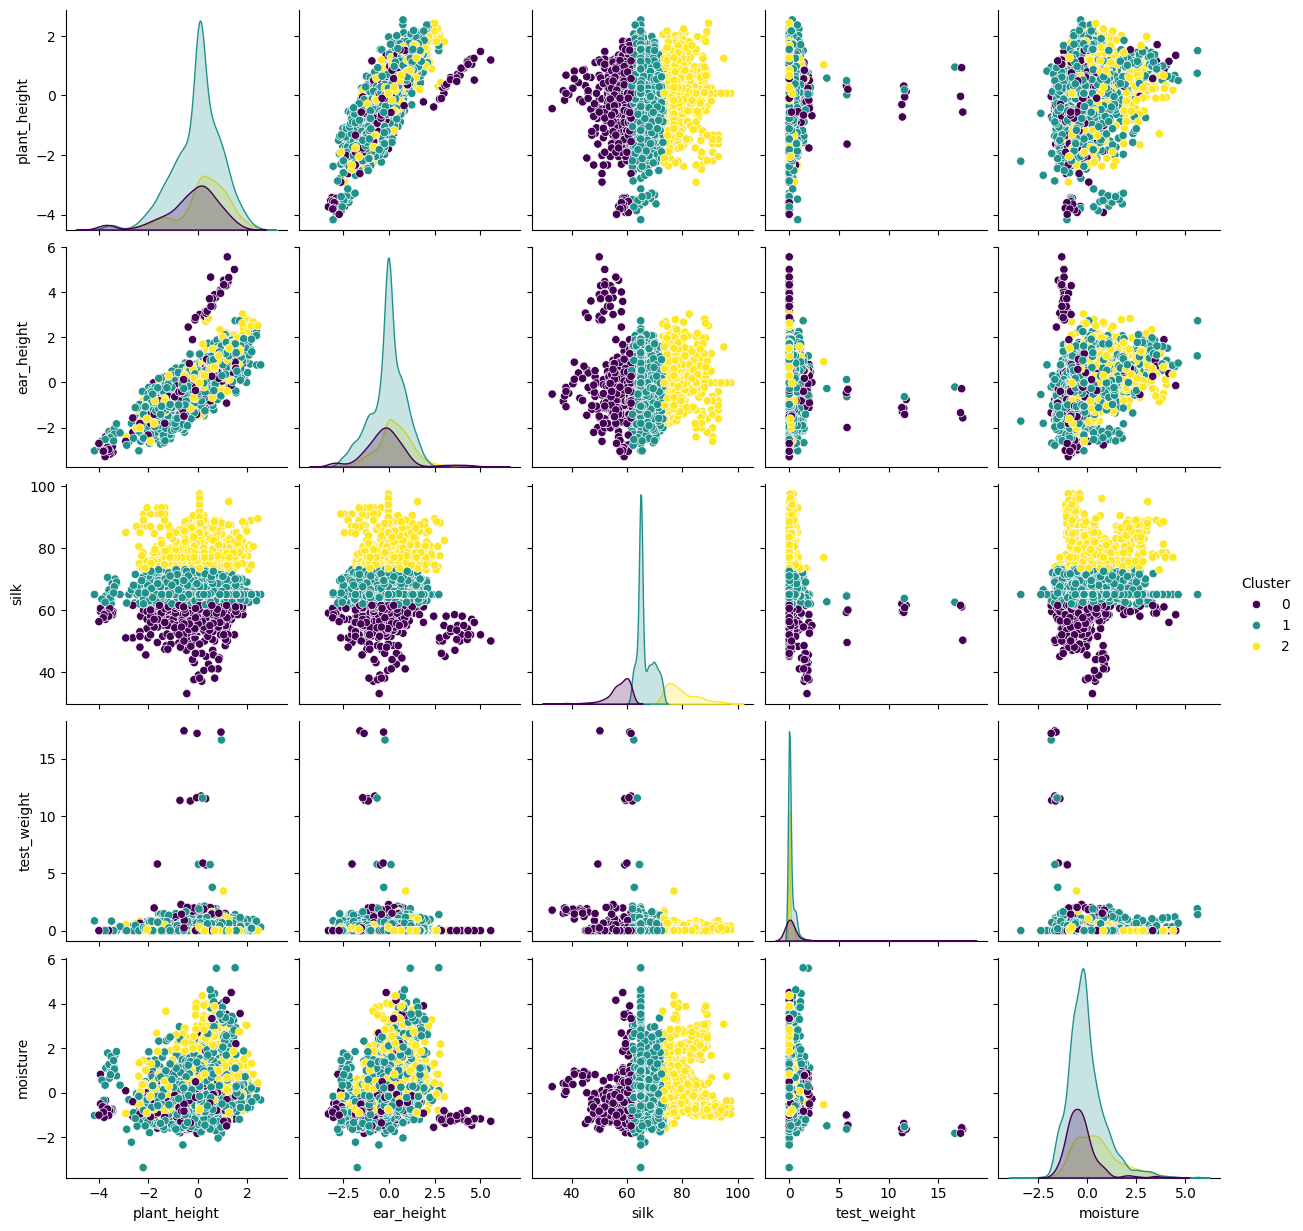

In [ ]:
#cluster learning
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
# Select features for clustering
clustering_features = ['plant_height', 'ear_height', 'silk',  'test_weight', 'moisture']# 'pollen',

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust the number of clusters (n_clusters) as needed
data['Cluster'] = kmeans.fit_predict(data[clustering_features])

# Visualize the clustering
sns.pairplot(data, vars=clustering_features, hue='Cluster', palette='viridis')
plt.show()

In [ ]:
#cluster learning

# Build separate Random Forest models for each cluster
cluster_models = {}
for cluster in data['Cluster'].unique():
    cluster_data = data[data['Cluster'] == cluster]
    X_cluster = cluster_data.drop(columns=['Win_YN'])
    y_cluster = cluster_data['Win_YN']
    model = RandomForestClassifier(random_state=42)
    model.fit(X_cluster, y_cluster)
    cluster_models[cluster] = model


In [ ]:
# Example: Predict using the model for Cluster 0
cluster_0_data = data[data['Cluster'] == 0].drop(columns=['Win_YN'])
cluster_0_model = cluster_models[0]
predictions = cluster_0_model.predict(cluster_0_data)

In [ ]:
prediction_data = pd.read_csv('pred_data_preprocess.csv')
prediction_data

,Unnamed: 0,Hybrid,moisture,test_weight,root_lodging,stalk_lodging,plant_height,ear_height,silk,latitude,...,veg_late_mean,flowering_mean,grainf_early_mean,grainf_late_mean,fallow_end_mean,height_x_flowering_radn,height_x_ear_height,silk_pollen_diff,test_weight_log,Cluster
0,0,4,0.338223,0.000001,-0.276965,-0.269013,0.068543,-0.000307,65.000000,41.994554,...,-0.580947,-0.168267,0.008150,-0.049693,-0.102187,-0.011534,-0.000021,1.0,9.999995e-07,2
1,1,0,1.101417,0.000001,-0.110732,-0.605601,0.995560,0.978138,65.000000,41.975931,...,-0.159387,-0.217125,-0.323509,0.053192,-0.256818,-0.216161,0.973795,1.0,9.999995e-07,2
2,2,10,0.509364,0.000001,-0.276965,3.012724,0.517100,0.351933,78.000000,42.732481,...,-0.252446,-0.246212,-0.689156,-0.862824,-1.216502,-0.127316,0.181985,1.5,9.999995e-07,1
3,3,35,-0.850508,0.000001,-0.276965,-0.269013,-1.935010,-1.428836,65.000000,44.208745,...,0.273320,-0.005015,-0.528290,-0.106951,-0.327993,0.009705,2.764812,0.5,9.999995e-07,2
4,4,3,-0.952267,0.000001,-0.276965,-0.353160,-0.723907,-0.039445,64.000000,35.838614,...,0.097453,0.395346,0.717852,0.478480,0.352857,-0.286193,0.028554,1.5,9.999995e-07,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
821,821,45,0.490862,0.000001,-0.276965,-0.269013,1.145079,1.075982,63.500000,38.895547,...,0.356675,1.142788,0.062270,0.902101,0.381510,1.308583,1.232085,3.0,9.999995e-07,2
822,822,20,-1.091029,0.156242,-0.276965,-0.269013,0.935753,-0.685218,59.500000,30.546318,...,-0.298176,0.198495,0.260887,0.332452,0.666772,0.185742,-0.641195,0.5,1.451747e-01,0
823,823,5,1.789062,0.109036,0.083207,-0.269013,0.751346,0.886816,69.666667,43.380750,...,0.328294,0.179038,-0.576911,-0.471576,-0.559161,0.134520,0.666306,1.5,1.034915e-01,2
824,824,39,2.035750,1.485853,-0.276965,-0.269013,-0.170687,-0.665649,50.500000,42.452930,...,-0.247316,-0.564747,-0.709766,-0.743836,-0.897517,0.096395,0.113618,3.0,9.106159e-01,0


In [ ]:
unnecessary_columns = ['Unnamed: 0', 'ID']  # Add any other extraneous columns
prediction_data = prediction_data.drop(columns=unnecessary_columns, errors='ignore')

print("Features used in training for Cluster {}:".format(cluster))
print(cluster_models[cluster].feature_names_in_)

print("Features in prediction data for Cluster {}:".format(cluster))
print(prediction_data.columns)

Features used in training for Cluster 2:
['Hybrid' 'moisture' 'test_weight' 'root_lodging' 'stalk_lodging'
 'plant_height' 'ear_height' 'silk' 'latitude' 'longitude' 'year'
 'field_location' 'State' 'fallow_initial_mean' 'veg_early_mean'
 'veg_late_mean' 'flowering_mean' 'grainf_early_mean' 'grainf_late_mean'
 'fallow_end_mean' 'height_x_flowering_radn' 'height_x_ear_height'
 'silk_pollen_diff' 'test_weight_log' 'Cluster']
Features in prediction data for Cluster 2:
Index(['Hybrid', 'moisture', 'test_weight', 'root_lodging', 'stalk_lodging',
       'plant_height', 'ear_height', 'silk', 'latitude', 'longitude', 'year',
       'field_location', 'State', 'fallow_initial_mean', 'veg_early_mean',
       'veg_late_mean', 'flowering_mean', 'grainf_early_mean',
       'grainf_late_mean', 'fallow_end_mean', 'height_x_flowering_radn',
       'height_x_ear_height', 'silk_pollen_diff', 'test_weight_log',
       'Cluster'],
      dtype='object')


In [ ]:
prediction_data['Win_YN'] = None

# Loop through clusters and make predictions
for cluster in prediction_data['Cluster'].unique():
    # Filter data for the current cluster
    cluster_data = prediction_data[prediction_data['Cluster'] == cluster]

    # Drop only the 'Win_YN' column (not 'Cluster') and keep other features
    X_cluster = cluster_data.drop(columns=['Win_YN'], errors='ignore')

    # Use the corresponding Random Forest model
    model = cluster_models[cluster]
    prediction_data.loc[cluster_data.index, 'Win_YN'] = model.predict(X_cluster)

In [ ]:
# Evaluate each cluster-specific model
for cluster in data['Cluster'].unique():
    cluster_data = data[data['Cluster'] == cluster]
    X_cluster = cluster_data.drop(columns=['Win_YN', 'Cluster'])
    y_cluster = cluster_data['Win_YN']

    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_cluster, y_cluster, test_size=0.2, random_state=42)

    # Train the model
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate
    #print(f"Cluster {cluster}:")
    #print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    #print("Classification Report:")
    #print(classification_report(y_test, y_pred))


In [ ]:
# cluster prediciton gave me 0.6 accuracy :()
prediction_data['hybrid_binomial'] = prediction_data['Win_YN'].map({1: 'Y', 0: 'N'})
final_data = prediction_data[['hybrid_binomial']]
final_data['ID'] = range(1, len(final_data) + 1)

print(final_data.head())
final_data.to_csv('final_predictions_03.csv', index=False)

  hybrid_binomial  ID
0               N   1
1               Y   2
2               N   3
3               N   4
4               N   5


<ipython-input-37-2dfe8edcd0a6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['ID'] = range(1, len(final_data) + 1)


In [ ]:
# hybrid learning
# Build one model per hybrid
hybrid_models = {}
for hybrid in data['Hybrid'].unique():
    hybrid_data = data[data['Hybrid'] == hybrid]
    X_hybrid = hybrid_data.drop(columns=['Win_YN', 'Hybrid'])
    y_hybrid = hybrid_data['Win_YN']

    model = RandomForestClassifier(random_state=42)
    model.fit(X_hybrid, y_hybrid)
    hybrid_models[hybrid] = model

# Predict for a specific hybrid
#specific_hybrid = data[data['Hybrid'] == 0].drop(columns=['Win_YN', 'Hybrid'])
#pecific_model = hybrid_models[0]
#predictions = specific_model.predict(specific_hybrid)

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
nnecessary_columns = ['Unnamed: 0', 'ID']  # Add any other extraneous columns
prediction_data = prediction_data.drop(columns=unnecessary_columns, errors='ignore')

print("Features used in training for Cluster {}:".format(cluster))
print(hybrid_models[hybrid].feature_names_in_)

print("Features in prediction data for Cluster {}:".format(cluster))
print(prediction_data.columns)

Features used in training for Cluster 2:
['moisture' 'test_weight' 'root_lodging' 'stalk_lodging' 'plant_height'
 'ear_height' 'silk' 'latitude' 'longitude' 'year' 'field_location'
 'State' 'fallow_initial_mean' 'veg_early_mean' 'veg_late_mean'
 'flowering_mean' 'grainf_early_mean' 'grainf_late_mean' 'fallow_end_mean'
 'height_x_flowering_radn' 'height_x_ear_height' 'silk_pollen_diff'
 'test_weight_log' 'Cluster']
Features in prediction data for Cluster 2:
Index(['Hybrid', 'moisture', 'test_weight', 'root_lodging', 'stalk_lodging',
       'plant_height', 'ear_height', 'silk', 'latitude', 'longitude', 'year',
       'field_location', 'State', 'fallow_initial_mean', 'veg_early_mean',
       'veg_late_mean', 'flowering_mean', 'grainf_early_mean',
       'grainf_late_mean', 'fallow_end_mean', 'height_x_flowering_radn',
       'height_x_ear_height', 'silk_pollen_diff', 'test_weight_log', 'Cluster',
       'Win_YN', 'hybrid_binomial'],
      dtype='object')


In [ ]:
# Evaluate each hybrid-specific model
for hybrid in data['Hybrid'].unique():
    hybrid_data = data[data['Hybrid'] == hybrid]
    X_hybrid = hybrid_data.drop(columns=['Win_YN', 'Hybrid'])
    y_hybrid = hybrid_data['Win_YN']

    # Skip small hybrid datasets
    if len(hybrid_data) < 10:
        print(f"Skipping Hybrid {hybrid} (insufficient data).")
        continue

    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_hybrid, y_hybrid, test_size=0.2, random_state=42)

    # Train the model
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate
    print(f"Hybrid {hybrid}:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    #print("Classification Report:")
    #print(classification_report(y_test, y_pred))


Hybrid 28:
Accuracy: 0.73
Hybrid 49:
Accuracy: 1.00
Hybrid 25:
Accuracy: 0.50
Hybrid 9:
Accuracy: 0.80
Hybrid 10:
Accuracy: 0.79
Hybrid 5:
Accuracy: 0.68
Hybrid 20:
Accuracy: 0.53
Hybrid 46:
Accuracy: 0.64
Hybrid 3:
Accuracy: 0.57
Hybrid 47:
Accuracy: 0.55
Hybrid 19:
Accuracy: 0.76
Hybrid 8:
Accuracy: 0.68
Hybrid 7:
Accuracy: 0.83
Hybrid 2:
Accuracy: 0.65
Hybrid 4:
Accuracy: 0.59
Hybrid 26:
Accuracy: 0.73
Hybrid 42:
Accuracy: 0.62
Hybrid 6:
Accuracy: 0.80
Hybrid 15:
Accuracy: 0.94
Hybrid 23:
Accuracy: 0.64
Hybrid 27:
Accuracy: 0.56
Hybrid 39:
Accuracy: 0.80
Hybrid 34:
Accuracy: 0.55
Hybrid 38:
Accuracy: 0.91
Hybrid 33:
Accuracy: 0.44
Hybrid 1:
Accuracy: 0.64
Hybrid 13:
Accuracy: 0.73
Hybrid 31:
Accuracy: 0.88
Hybrid 30:
Accuracy: 0.54
Hybrid 0:
Accuracy: 0.63
Hybrid 21:
Accuracy: 0.64
Hybrid 12:
Accuracy: 0.50
Hybrid 16:
Accuracy: 0.70
Hybrid 18:
Accuracy: 0.71
Hybrid 41:
Accuracy: 0.55
Hybrid 44:
Accuracy: 0.60
Hybrid 24:
Accuracy: 0.60
Hybrid 37:
Accuracy: 0.41
Hybrid 32:
Accuracy: 0

In [ ]:
#prediction_data.drop(columns='Unnamed: 0',inplace=True) #,'year', 'fallow_end_mean','unk_11_mean']
#prediction_data.drop(columns=low_importance_features)


In [ ]:
print("Training Columns:")
print(X_train.columns)

print("Prediction Columns:")
print(prediction_data.columns)

Training Columns:
Index(['moisture', 'test_weight', 'root_lodging', 'stalk_lodging',
       'plant_height', 'ear_height', 'silk', 'latitude', 'longitude', 'year',
       'field_location', 'State', 'fallow_initial_mean', 'veg_early_mean',
       'veg_late_mean', 'flowering_mean', 'grainf_early_mean',
       'grainf_late_mean', 'fallow_end_mean', 'height_x_flowering_radn',
       'height_x_ear_height', 'silk_pollen_diff', 'test_weight_log',
       'Cluster'],
      dtype='object')
Prediction Columns:
Index(['Hybrid', 'moisture', 'test_weight', 'root_lodging', 'stalk_lodging',
       'plant_height', 'ear_height', 'silk', 'latitude', 'longitude', 'year',
       'field_location', 'State', 'fallow_initial_mean', 'veg_early_mean',
       'veg_late_mean', 'flowering_mean', 'grainf_early_mean',
       'grainf_late_mean', 'fallow_end_mean', 'height_x_flowering_radn',
       'height_x_ear_height', 'silk_pollen_diff', 'test_weight_log', 'Cluster',
       'Win_YN', 'hybrid_binomial'],
      dtype='

In [ ]:
prediction_data = prediction_data[X_test.columns]


In [ ]:
columns_to_drop_02 = ['year', 'fallow_end_mean','field_location']
prediction_data = prediction_data.drop(columns=columns_to_drop_02, errors='ignore')

In [ ]:
print("Training Columns:")
print(X_train.columns)

print("Prediction Columns:")
print(prediction_data.columns)

Training Columns:
Index(['moisture', 'test_weight', 'root_lodging', 'stalk_lodging',
       'plant_height', 'ear_height', 'silk', 'latitude', 'longitude', 'year',
       'field_location', 'State', 'fallow_initial_mean', 'veg_early_mean',
       'veg_late_mean', 'flowering_mean', 'grainf_early_mean',
       'grainf_late_mean', 'fallow_end_mean', 'height_x_flowering_radn',
       'height_x_ear_height', 'silk_pollen_diff', 'test_weight_log',
       'Cluster'],
      dtype='object')
Prediction Columns:
Index(['moisture', 'test_weight', 'root_lodging', 'stalk_lodging',
       'plant_height', 'ear_height', 'silk', 'latitude', 'longitude', 'State',
       'fallow_initial_mean', 'veg_early_mean', 'veg_late_mean',
       'flowering_mean', 'grainf_early_mean', 'grainf_late_mean',
       'height_x_flowering_radn', 'height_x_ear_height', 'silk_pollen_diff',
       'test_weight_log', 'Cluster'],
      dtype='object')


In [ ]:
#prediction_data['Win_YN'] = model.predict(prediction_data)

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- fallow_end_mean
- field_location
- year


In [ ]:

prediction_data['hybrid_binomial'] = prediction_data['Win_YN'].map({1: 'Y', 0: 'N'})
final_data = prediction_data[['hybrid_binomial']]
final_data['ID'] = range(1, len(final_data) + 1)

print(final_data.head())
final_data.to_csv('final_predictions_09.csv', index=False)

KeyError: 'Win_YN'